# Lecture 8: pymc3 
## ——基于Python的概率编程框架

## Instructor： 胡传鹏（博士）[Dr. Hu Chuan-Peng]

### 南京师范大学心理学院[School of Psychology, Nanjing Normal University]

## Part 1: MCMC

### 课前回顾: 

- 后验计算的问题
- 采样方法(蒙特卡洛方法)
- 马尔可夫链
- MCMC(马尔可夫蒙特卡洛方法)
- Metroplis-Hasting(MH)算法

- 后验计算的问题

$p(\theta|data) = \frac{p(data|\theta)p(\theta)}{\pmb {p(data)}}$

但是问题在于

1.求积分往往是很难的，并且有些积分可能没有解析解。
$P(data) =\int_{\theta}^{} p(data,\theta) =\int_{\theta}^{} p(data|\theta)p(\theta)d\theta$


2.若后验分布比较复杂，即使获得后验分布，也难以计算期望值。
$E(\theta) =\int_{\theta}^{} \theta p(\theta|data) d\theta$

- 采样方法(蒙特卡洛方法)

许多概率的问题非常复杂并且无法直接计算的。

但是我们可以通过大量模拟去接近真实的发生概率，即：

$p(发生的概率)=\frac{模拟情形下事件发生的次数}{模拟的次数}$

一个经典的例子是通过蒙特卡洛方法来求出不规则图形的面积。


![Image Name](https://cdn.kesci.com/upload/image/rk6x6gx69n.png?imageView2/0/w/640/h/640)

该方法的一个具体应用为 **接受-拒绝采样**

为了求解一个不常见的分布$p(x) = 0.3*e^{-(x-0.3)^2} + 0.7*e^{-(x-2)^{2/0.3}}/1.21$。

1. 我们可以首先在一个常见的正态分布q(x)中进行采样进行采样，往往称为**建议分布(proposal distribution)**。
2. 如果该x对应的p(x)离q(x)距离近，即两个函数的y值接近，我们就接受该x的采样，否则拒绝该采样。

  我们通过 $\frac{p(θ)}{q(θ)} \ge U$ 判断是否接受该参数值

3. 这样反复采样在进行拒绝的过程，可以使得最后的采样样本接近 p(x) 分布。


![Image Name](https://cdn.kesci.com/upload/image/rk6x6xprcw.png?imageView2/0/w/640/h/640)

- 马尔可夫链

马尔科夫链假设某一时刻状态转移的概率只依赖于它的前一个状态。

$P(X_{t+1}|...X_{t−2},X_{t−1},X_{t})=P(X_{t+1}|X_{t})$

上述公式可以表示为状态转移矩阵：

$\begin{bmatrix}
     &  陆地 & 海洋\\
陆地& 0.75 & 0.25\\
海洋 & 0.1 & 0.9\\ 
\end{bmatrix}$

马尔科夫链的**特征**在于：

无论初始状态如何，只要状态转移一直持续下去，处在每个状态的概率会服从一个平稳分布。


![Image Name](https://cdn.kesci.com/upload/image/rk6x7auvhk.png?imageView2/0/w/640/h/640)

- MCMC(马尔可夫蒙特卡洛方法)

结合了以下特征：
1. 蒙特卡洛方法中的采样思想
2. 接受拒绝采样中的接受率
3. 马尔可夫链中状态依赖与状态转移后形成平稳分布

MCMC方法结合了很多优秀思想与特性，使得我们可以从一个简单的分布中采样，然后不断地接近复杂地目标分布。

- Metroplis-Hasting(MH)算法

MCMC不是一个具体的采样算法，而是一类算法簇。这类算法都具有上述特征。

Metroplis-Hasting 算法是MCMC当中的一种经典实现。

MH的特点在于扩展了接受拒绝采样法，主要体现为：
1. 利用马尔科夫链的性质，从上一次采样相关的建议分布中进行采样，
   - 即从随机采样 `proposal_theta = st.norm(0.5,0.1).rvs(1)` 变为 `theta_t1 = st.norm(theta_t0,0.1).rvs(1)`
2. 通过两次采样的后验比值去判断是否接受参数，而不是和随机分布进行比较。
   - 即$\frac{p(theta)}{ q(theta)} \ge U$ 转变为 $\frac{p(theta_{t1})}{ p(theta_{t0})} \ge U$。

MH算法虽然比接受拒绝采样多了诸多优点，但其仍然存在不足：
1. proposal distribution 的标准差太大会导致大量被拒绝的样本，而太小的标准差会导致花费更长时间来“探索分布”

  `proposal_theta1 = st.norm(proposal_theta0,0.5).rvs(1)` 比如将建议分布的标准差从0.5修改为5

2. 当模型参数很多的时候，MH 采样的效率非常低，因为它的采样是根据 proposal distribution随机选取的
3. 对于高维后验分布，MH 的采样是非常不均匀的

### 实践中的MCMC

通过MH算法，我们了解了MCMC的诸多特性。

但是在实际数据分析中，仅使用MH算法往往会因其缺点而遇到各种问题。

因此，在实际操作中，更常用的是以下MCMC算法，包括：
- 吉布斯采样 (Gibbs sampling)
- 哈密顿蒙特卡洛(Hamiltonian Monte Carlo, HMC)
- 差分进化算法 (Differential evolution) DE-MCMC

MCMC采样的一个难题是，如果后验分布函数 $p(\theta)$ 中存在多个参数 $\theta$ 需要估计该怎么办？

比如，在一个有两个参数(维度)的后验分布中，

其中灰黑色等高线是后验的负数 $-p(\theta_{i})$，

蓝色线条所在平面代表两个参数 $\theta_{1}$, $\theta_{2}$。

![Image Name](https://cdn.kesci.com/upload/image/rjvgyvcsre.gif?imageView2/0/w/640/h/640)

绿色为接受的采样，红色是拒绝的采样。

根据MH算法，我们需要从多个参数的联合分布 $p(\theta_{1},\theta_{2})$ 中进行采样。

即，每次我们从蓝色线条所在平面采样一个点，都会得到其两个维度的值，这两个值对应了$\theta_{1}$, $\theta_{2}$。

MH的问题在于：
- 如果参数维度大于二，比如一个后验分布有n个参数，那么每次采样一个点，就对应n个参数$\theta_{n}$。
- 此时的联合分布也非常复杂，$p(\theta_{1},\theta_{2}, ..., \theta_{n})$。

这样的结果是，采样受到维度的影响，随机性增加了，这会导致拒绝参数的概率增加，比如上图中红的点为MH算法拒绝的参数。

**吉布斯采样 (Gibbs sampling)**

为了解决多参数采样的问题，Gibbs算法提供了一个非常简单的思路。

在对一个参数进行采样时，固定其他参数：

- 比如，对于二维参数，Gibbs采样首先对 $\theta_{1} \sim p(\theta_{1}$ 进行采样
- 之后固定 $\theta_{1}$, 对$\theta_{2} \sim p(\theta_{2}|\theta_{1})$ 进行采样
- 其**特点**在于将对联合分布的采样转化为条件分布，即从 **$p(\theta_{2},\theta_{1})$ 变为 $p(\theta_{2}|\theta_{1})$**

使用Gibbs sampling对二元高斯分布进行采样

![Image Name](http://gorayni.github.io/assets/posts/gibbs/gibbs2.gif)

Gibbs采样可以看作是 MH 算法的一个**特例**。因为它只是减少了MH计算的复杂度。

此外，Gibbs采样不是对一组参数 $\theta_{n}$ 进行接受和拒绝的判断，而是分别对 $\theta_{1},\theta_{2}, ..., \theta_{n}$ 进行接受和拒绝的判断，这提高了接受参数的概率。

Gibbs采样的问题在于，这种简化存在代价：
- 参数间要满足条件分布的假设，不满足假设可能导致采样时拒绝率会很高，或者采样分布无法近似后验分布。
- 对条件分布的采样可以提高采样的效率(相对于MH)，但同样会受到多峰分布的影响。

**哈密顿蒙特卡洛(Hamiltonian Monte Carlo, HMC)**

为了解决 MH 中 proposal distribution 由于随机采样导致效率低的问题，HMC孕育而生。

HMC结合物理概念来优化 MCMC：
- HMC 通过基本物理规律 **能量=势能+动能** 假设采样的分布(后验分布)为系统的总能量，然后将该系统分为两个子部分
- 由于动量增加，势能就会减少，因此**系统总能量不会变化**。这说明我们采样的分布不会因为系统的动态变化而变化，这类似于马尔科夫的平稳分布


![Image Name](https://cdn.kesci.com/upload/image/rjviiji42v.gif?imageView2/0/w/640/h/640)

- 势能，与位置有关，比如对于重力势能，高度越高，势能越大。
  
  相似的，可以**把参数的位置看作高度，把参数对应的似然看作势能**。
	
	在拒绝采样中，似然值越大对应的参数越有可能被接受，因此，这里势能越大的参数也越有可能被接受。

- 动能，与速度有关，比如动能公式 $\frac{1}{2}mv^2$。
  
	其对应的是似然函数的梯度，梯度指向了似然最大的地方，即图中的波谷(这里的灰黑色等高线是后验的负数 $-p(\theta_{i})$
	
	从图中可以发现，沿着梯度进行采样可以更多的采样到波谷位置的参数。这比MH算法根据建议分布进行随机采样的效率更高。

![Image Name](https://cdn.kesci.com/upload/image/rjvh3zx4an.gif?imageView2/0/w/640/h/640)


绿色为接受的采样，红色是拒绝的采样。

从图中可以看到，HMC算法几乎没有被拒绝的采样，其采样效率高。

红色的线条是 HMC 表示沿着梯度进行采样。

HMC的特点总结：
- 结合 **能量=势能+动能** 的物理特性
- 其中，势能与MH计算似然进行接受拒绝类似
- 动能为HMC算法独特的一部分，即需要额外计算梯度
- 通过梯度进行采样，能凭借更少的样本接近后验

HMC算法的缺点
- 如果无法计算后验分布函数的梯度，那么就无法使用HMC
- 计算梯度和计算似然都很花费算力，但是相比于MH和Gibbs，HMC所需的采样数量更少

**差分进化算法 (Differential evolution) DE-MCMC**

当参数太多时(比如多于20个)：
- 尽管Gibbs采样可以从条件分布进行采样，但参数越多，需要求解的条件概率越多，这导致采样方法变慢。
- 对于HMC来说，参数太多时梯度计算也非常困难。

差分进化算法的目的在于：通过生物系统中的**遗传进化算法**解决多参数采样的问题。

其特点在于：
- 把多个参数**采样**视作**生物种群**，种群中每个个体的**基因特征**视作**参数维度**
- 生物种群会随着迭代进行迁移
- 个体会随着迭代产生基因突变

**生物种群与个体**

相较于其他算法每次从建议分布中抽取1个参数样本，DE算法会一次性从建议分布中抽取多个参数样本。

这多个参数样本形成了一个种群。

由于每个参数样本包含多个参数维度，这些不同参数维度构成了每个样本的基因特征。

$x_{i}$ 为种群中的个体, i属于1到n。

> $x_{i}$ 也被称为不同的chain。
> plus，相较于其他算法只有4-5chain，DE的chain是他们的数10倍。

$theta_{j}$ 为个体的基因, j属于1到m。

|              | x1  | x2  | x3  | ... | xn  | 
| -----        | --- | --- | --- | --- | --- | 
| $\theta_{1}$ | 5   | 2   | 5  | ... | 3   |
| $\theta_{2}$ | 3   | 3   | 4  |  ... | 2   |
| $\theta_{3}$ | 1   | 2   | 4  | ... | 1   |
| ...          | ... | ... | ... | ... |  ...|  
| $\theta_{m}$ | 4   | 5   | 4  |  ... | 5    |

**基因变异与迭代**

DE的最重要的特点为，每个个体(chain)的基因(参数维度)可以突变。

具体表示为： $v_{i}=x_{r 1}+\lambda *\left(x_{r 2}-x_{r 3}\right)$

突变分为三个步骤：
1. 随机从种群中选择三个个体, 即上面的三列数据。用 $x_{r 1}$, $x_{r 2}$ 和 $x_{r 3}$ 表示。
2. 突变的差异为 $x_{r 2}-x_{r 3}$ 两个向量的差，如下图。
3. 这个突变的差异会施加给第三个个体 $x_{r 1}$, 形成新的一代个体 $v_{1}$

如同生物进化一样，每个新的个体 $v_{1}$ 包含了父代 $x_{r 1}$ 的基因，也允许了已经基因的变化。

> plus, 其中 $\lambda$ 是突变系数，控制突变的大小。

![Image Name](https://matteding.github.io/images/diff_evol.gif)

**种群的迁移**

由于每次基因突变意味着新的个体产生，即新的种群 $v_{i}$

|              | v1  | v2  | v3  | ... | vn  | 
| -----        | --- | --- | --- | --- | --- | 
| $\theta_{1}$ |  2  | 2   | 3  | ... | 3   |
| $\theta_{2}$ | 3   | 6   | 3  |  ... | 4   |
| $\theta_{3}$ | 1   | 2   | 1  | ... | 1   |
| ...          | ... | ... | ... | ... |  ...|  
| $\theta_{m}$ | 3   | 5   | 3  |  ... | 4    |

而在生物进化中，新生的个体不意味着一定存活，而父辈个体也可能还没有死亡。

因此我们允许上一代老的种群 $x_{i}$ 和新的种群 $v_{i}$ 同时存在。

但我们会保持种群个体数n不变。因此我们会在 $v_{i}$ 中随机挑选一些个体，用 $x_{i}$ 的个体进行替换。

DE-MCMC算法总结：
- DE算法融合了生物进化的特性
- 其中，基因变异部分的向量变化和HMC算法中的梯度类似
- 迁移部分是DE算法更加独特的一部分，它将不同的chain进行混合，增加了采样的随机性

DE-MCMC算法的缺点：
- 需要大量的个体(chain)，因此计算量大
- 当参数太少，采样的效率低，并且没有其他算法对后验的近似度高

**三种算法的对比：**


|          | Gibbs                            | HMC            | DE                     |
| -------- | -------------------------------- | -------------- | ---------------------- |
| 优点     | 用于处理多参数的情景, 速度相对较快         | 采样效率高         | 适用于参数非常多的情况 |
| 特点     | 与 MH 算法类似，对条件分布进行采样         | 结合了物理特性，考虑了分布函数梯度 | 结合了生物遗传特性         |
| 缺点     | 需要较多采样样本，需满足条件分布的假设 | 需要额外计算梯度   | 需要很多chain，计算量大   |
| 代表工具 | R-JAGS                           | Rstan 和 pymc  | pymc                   |

HMC是现代最流行的算法，其变种 No-U-Turn sampler（NUTS）方法是 pymc 和 Stan 默认使用算法。


![Image Name](https://cdn.kesci.com/upload/image/rjvix0jc6b.png?imageView2/0/w/320/h/320)


![Image Name](https://cdn.kesci.com/upload/image/rjviyt1d5d.png?imageView2/0/w/320/h/320)

# Part2: Probabilistic Programming Languages (PPL) and PyMC3

## Probabilistic Programming Languages (PPL)

回顾一下我们第一节课和后续课程的内容：贝叶斯模型是一种更好的方法。

贝叶斯方法有一个显著的优势：每次使用贝叶斯方法我们都是得到一个分布并进行推断，这个分布也代表了一个有关世界结构的模型（小世界与大世界）。

同时，确定性编程是一个非常精确的模型相同的输入总是产生相同的输出，如：

In [19]:
sum([1,2])

3

而给普通的编程语言加入概率的元素并创造出一种有助于贝叶斯推断的计算模型也是学术界和工业界的需求。

这两种观念一拍即合就产生了Probabilistic Programming Languages (PPL)，即概率编程语言。

概率编程语言与普通编程语言/确定性编程不同
- 因为概率编程语言允许使用者可以使用普通程序中的语法来指定一个随机过程，它简化了概率模型的开发
- 概率程序从建模的联合分布中生成样本，并在给定模型的情况下自动进行推断

概率编程语言执行流程
- 概率编程语言通过用计算机语言建构一个模型

- 这个建立的模型生成观察值

- 内置的推断方法将观测值返回可能生成观察值的参数分布

- 之后还可以通过检验后验概率生成的数据对模型进行评估



![Image Name](https://cdn.kesci.com/upload/image/rk4wg2rtm.jpg?imageView2/0/w/960/h/960)

通俗地说，PPL就是一种规范的语法，来描述带有概率的推理过程（生成过程）。

### 一些常见的概率编程语言

- Stan：主要来自哥伦比亚大学的Andrew Gelman、Bob Carpenter和其他人开发的PPL。它有自己的模型规范语言，然后将其转换为C++代码，最后编译为机器代码。良好的R和python接口可用（rstan, PyStan）。更多信息查看：https://mc-stan.org/
- PyMC3：一个广泛使用的带有Theano后端的Python开源PPL，由John Salvatier、Thomas Wiecki、Chris Fonnesbeck和其他贡献者开发。更多信息查看：https://docs.pymc.io/en/v3/
- Edward和Edward2：是一个用于概率建模、推断的Python库。由Google的Dustin Tran、哥伦比亚大学的David Blei 和其他合作者的基于TensorFlow的开发的PPL。更多信息查看：https://github.com/google/edward2
- Pyro：由Uber AI Labs创建的带有PyTorch后端的PPL。更多信息查看：https://pyro.ai/

![常见的ppl](https://cdn.kesci.com/upload/image/rk8m3hh1o1.png?imageView2/0/w/960/h/960)

## PyMC3

PyMC是Python的概率编程库，允许用户使用简单的Python API构建贝叶斯模型，并使用马尔可夫链蒙特卡洛（MCMC）方法拟合它们。


![Image Name](https://cdn.kesci.com/upload/image/rk56d0ypat.png?imageView2/0/w/960/h/960)

相比于其他概率编程语言，Pymc有以下几种优势：
- 基于python强大的社区，Pymc可以包括很多新的算法


- 相比于其他概率编程语言，Pymc写模型更加容易（定义模型时更加符合我们平时使用的语言）


- 速度相对较快



这些是基于所有参数的最小有效样本量 (ESS) 的非常初步的结果。每个模型都运行了10000次迭代的单个链（带有1000次预热）。所有PPL都在Colab中运行。
![Image Name](https://cdn.kesci.com/upload/image/rk8m6lwp5o.png?imageView2/0/w/960/h/960)

## Installation

Pymc3需要使用使用theano库来进行快速的数值计算，但是该库已经停止继续维护了，所以安装theano库时可能会出现一些问题。解决方法如下：

```
# windows电脑在终端输入下面代码
python3 -m pip uninstall theano

python3 -m pip uninstall theano-pymc

python3 -m pip uninstall pymc3

python3 -m pip install pymc3
```

```
#mac电脑直接使用pip后面的内容即可
pip uninstall theano

pip uninstall theano-pymc

pip uninstall pymc3

pip install pymc3
```

安装问题可以访问链接链接：https://github.com/pymc-devs/pymc/issues/4479

安装完成后可以按照下方的代码进行导入：

In [20]:
#基本的库和模块
import numpy as np
from scipy import stats
import pandas as pd
from patsy import bs, dmatrix
import matplotlib.pyplot as plt

#贝叶斯模型探索分析
import arviz as az

# 概率编程语言
import bambi as bmb
import pymc3 as pm
import tensorflow_probability as tfp

tfd = tfp.distributions

#计算后端
import theano
import theano.tensor as tt
import tensorflow as tf

## Part 3: The syntax of pymc3

有研究发现社交网站的使用在促进知识共享和个体创新行为中起到了关键作用，个体在使用社交网站时往往能获得在线社会支持，可以帮助个体提高对自身创新行为产生的能力和信心的评估——即创新自我效能感。我们想要探究大学生的社交网站使用强度和创新自我效能感对个体创新行为的影响。

SNS_t:社交网站使用强度；
CSES_t:创新自我效能感；
EIB_t创新行为

引用：郑元瑞, 谢嘉敏, 李鹏. (2022) 社交网站使用强度对大学生创新行为的影响：一个有调节的中介模型. 心理技术与应用, 10(8), 483-491.

In [21]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
#sklearn是用于机器学习的包，precessing是其中的预处理模块，StandardScaler函数的作用是将变量标准化
from sklearn.preprocessing import StandardScaler
#mpl_toolkits.mplot3d是用于三维画图的包，Axes3D用于画三维图
from mpl_toolkits.mplot3d import Axes3D

In [22]:
np.random.seed(123) #随机数种子，确保随后生成的随机数相同
data = pd.read_csv("../data/creativity.csv")#读取数据
data['SNS_t'] = (data['SNS_t'] - data['SNS_t'].mean()) / data['SNS_t'].std()#将变量进行标准化
data['CSES_t'] = (data['CSES_t'] - data['CSES_t'].mean()) / data['CSES_t'].std()#将变量进行标准化
data['EIB_t'] = (data['EIB_t'] - data['EIB_t'].mean()) / data['EIB_t'].std()#将变量进行标准化

/var/folders/06/d73mk4410yg1bfrx52fmy4jw0000gn/T/ipykernel_62713/3950546617.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax2 = Axes3D(fig2)


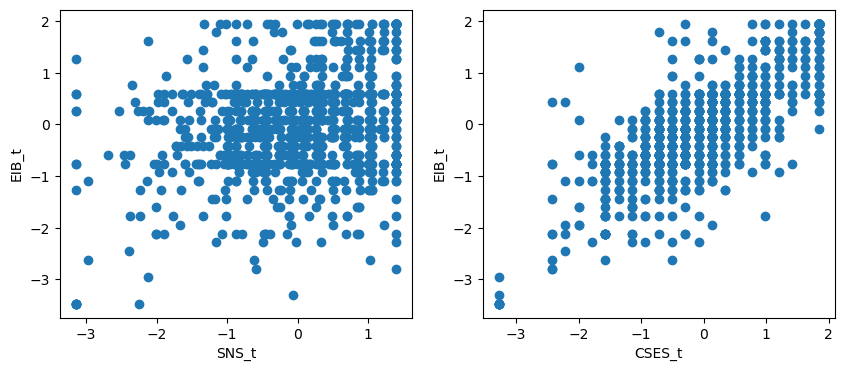

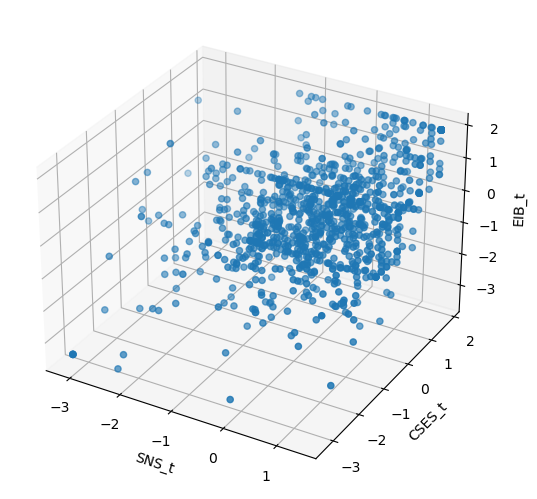

In [23]:
#创建一个画布fig1，该画布有两幅图ax1,ax2，画布尺寸为（10，4）
fig1,ax1 = plt.subplots(1,2,figsize=(10,4))
#在第一张图上画散点图
ax1[0].scatter(data['SNS_t'],data['EIB_t'] )
ax1[0].set_xlabel('SNS_t')
ax1[0].set_ylabel('EIB_t')
#在第一张图上画散点图
ax1[1].scatter(data['CSES_t'],data['EIB_t'] )
ax1[1].set_xlabel('CSES_t')
ax1[1].set_ylabel('EIB_t')
#在第二张图上画散点图
fig2 = plt.figure(2)
ax2 = Axes3D(fig2)
ax2.scatter(data['SNS_t'],data['CSES_t'],data['EIB_t'] )
ax2.set_xlabel('SNS_t')
ax2.set_ylabel('CSES_t')
ax2.set_zlabel('EIB_t')
plt.show()

我们可以建立线性模型来表达创新自我效能感和社交网站使用强度对个体创新行为的预测关系。我们可以使用pymc3来建立该方程.

在pymc3中，一个简单的线性模型：

1. 通过建立线性模型的概率表达形式来构建模型。

2. 通过PyMC对后验进行采样

3. 通过Arviz对结果进行展示，辅助统计推断

线性模型可以用概率的形式进行表达


$\alpha \sim Normal(0,10)$      ->      a $\sim$ Normal(mu,sigma)

$\beta  \sim Normal(0,10)$      ->      b $\sim$ Normal(mu,sigma)

$\sigma \sim HalfNormal(1)$      ->      sigma $\sim$ HalfNormal(1)

$\mu_i  = \alpha+\beta_1* x1 +\beta2* x_2$      ->      mu = alpha + beta1 * x1 +beta2 * x2

$y \sim Normal(\mu_i,sigma)$      ->      y $\sim$ Normal(mu,sigma)

接下来我们将展示如何用代码将这一形式进行表达。

#### 模型构建

In [24]:
#首先，载入pymc3这个包，将其命名为pm
import pymc3 as pm
#在pymc3中，pm.Model()定义了一个新的模型对象，这个对象是模型中随机变量的容器
#在python中，容器是一种数据结构，是用来管理特殊数据的对象
#with语句定义了一个上下文管理器，以 linear_model 作为上下文，在这个上下文中定义的变量都被添加到这个模型
with pm.Model() as linear_model:
    #alpha,beta,sigma这三个参数是随机变量，表示模型参数的先验分布
    alpha = pm.Normal('alpha',mu=0,sd=10)
    beta = pm.Normal('beta',mu=0,sd=10,shape=2)
    sigma = pm.HalfNormal('sigma',sd=1)
    #x1,x2为自变量，是之前已经载入的数据
    x1 = pm.Data("x1", data['SNS_t'])
    x2 = pm.Data("x2", data['CSES_t'])
    #mu是确定性随机变量，这个变量的值完全由右端值确定
    mu = pm.Deterministic("mu", alpha + beta[0]*x1 + beta[1]*x2) 
    # Y的观测值，这是一个特殊的观测随机变量，表示模型数据的可能性。也可以表示模型的似然，通过 observed 参数来告诉这个变量其值是已经被观测到了的，不会被拟合算法改变
    y_obs = pm.Normal('y_obs',mu=mu,sd=sigma,observed=data['EIB_t'] )


该模型结构可以用可视化的形式进行表达。

可以通过pymc自带的可视化工具将模型关系可视化。

x1，x2为自变量。

参数 $\alpha$ 是线性模型的截距，而 $\beta1$，$\beta2$ 是斜率。

参数$sigma$是残差，因变量为$y$。

模型图展示了各参数通过怎样的关系影响到因变量。

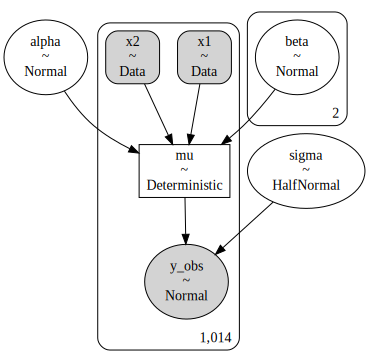

In [25]:
pm.model_to_graphviz(linear_model)

#### 模型拟合

构建模型之后，我们可以进行模型拟合

获得模型中未知变量的后验估计。考虑两个方法：
（1）使用优化方法找到参数的极大后验估计点(maximum a posteriori(MAP))

我们也可以使用极大后验估计 MAP(pm.find_MAP)来进行优化。

（2）使用MCMC采样方法获得后验分布来计算。

在本例中，我们使用MCMC来进行采样，函数为pm.sample(),

In [26]:
#采样过程仍在该容器中进行
with linear_model :
    # 使用mcmc方法进行采样，draws为采样次数，tune为调整采样策略的次数，这些次数将在采样结束后被丢弃，
    # target_accept为接受率， return_inferencedata=True为该函数返回的对象是arviz.InnferenceData对象
    # chains为我们采样的链数，cores为我们的调用的cpu数，多个链可以在多个cpu中并行计算，我们在和鲸中调用的cpu数为2
    trace = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2,return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Process worker_chain_0:
Traceback (most recent call last):
  File "/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/pymc3/parallel_sampling.py", line 137, in run
    self._start_loop()
  File "/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/pymc3/parallel_sampling.py", line 178, in _start_loop
    msg = self._recv_msg()
  File "/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/pymc3/parallel_sampling.py", line 169, in _recv_msg
    return self._msg_pipe.recv()
  File "/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
  File "/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/multiprocessing/connec

KeyboardInterrupt: 

#### 参数的后验分布
这里的模型分析结果展示了各参数的分布(后验)情况

arviz的plot_trace会展示左右两幅图

左图描述了采样的各个马尔可夫链参数的后验分布，左图的横坐标为后验分布的取值范围，纵轴为概率密度。如果有两个参数在同一幅图中，就会用不同颜色的曲线表示

右图描述了采样的各个马尔可夫链的参数的采样情况，右图的横坐标为每次采样次数，纵坐标为每一次采样的值

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

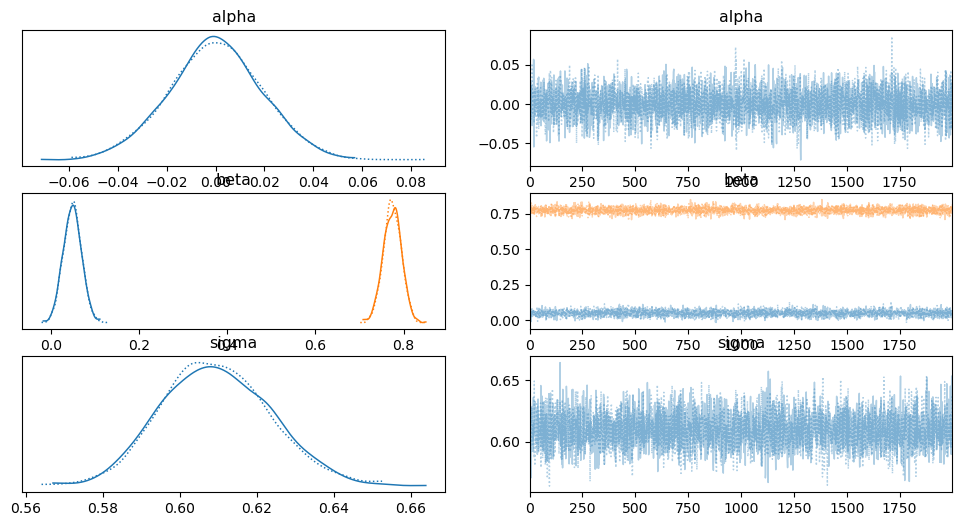

In [ ]:
# 绘制特定参数的采样情况，选取对象为trace，选取其中'alpha','beta','sigma'三个参数
az.plot_trace(trace,var_names=['alpha','beta','sigma'])

arviz的plot_forest会展示森林图

该图会展示不同后验分布的94%的可信区间，横轴为后验分布的取值范围，纵轴为不同参数。

对于每一个参数，粗线展示了采样的各马尔可夫链的94%的可信区间，细线展示了参数的取值范围。

若r_hat=True，右图会展示r_hat的值，该值通过比较模型参数的链间和链内估计值反映了采样的收敛性，r-hat值越接近1则收敛情况越好。

array([<AxesSubplot:title={'center':'94.0% HDI'}>,
       <AxesSubplot:title={'center':'r_hat'}>], dtype=object)

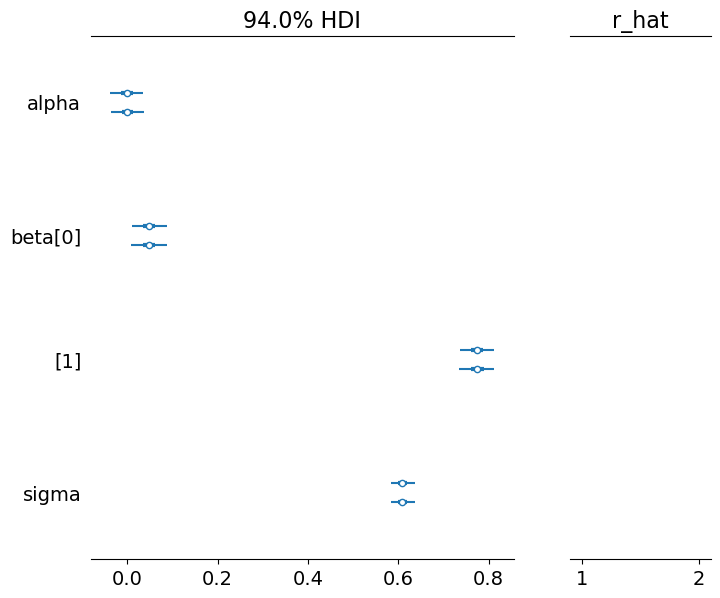

In [ ]:
# 绘制特定参数的森林图，选取对象为trace，选取其中'alpha','beta','sigma'三个参数
az.plot_forest(trace,var_names=['alpha','beta','sigma'],r_hat=True)

arviz的plot_posterior绘制了参数的后验分布图

该图的横轴为后验分布值，横线为94%可信区间，曲线高度代表概率密度，曲线上方展示了后验分布的平均值

beta0大于0的概率为0.99675
beta1大于0的概率为0.99725


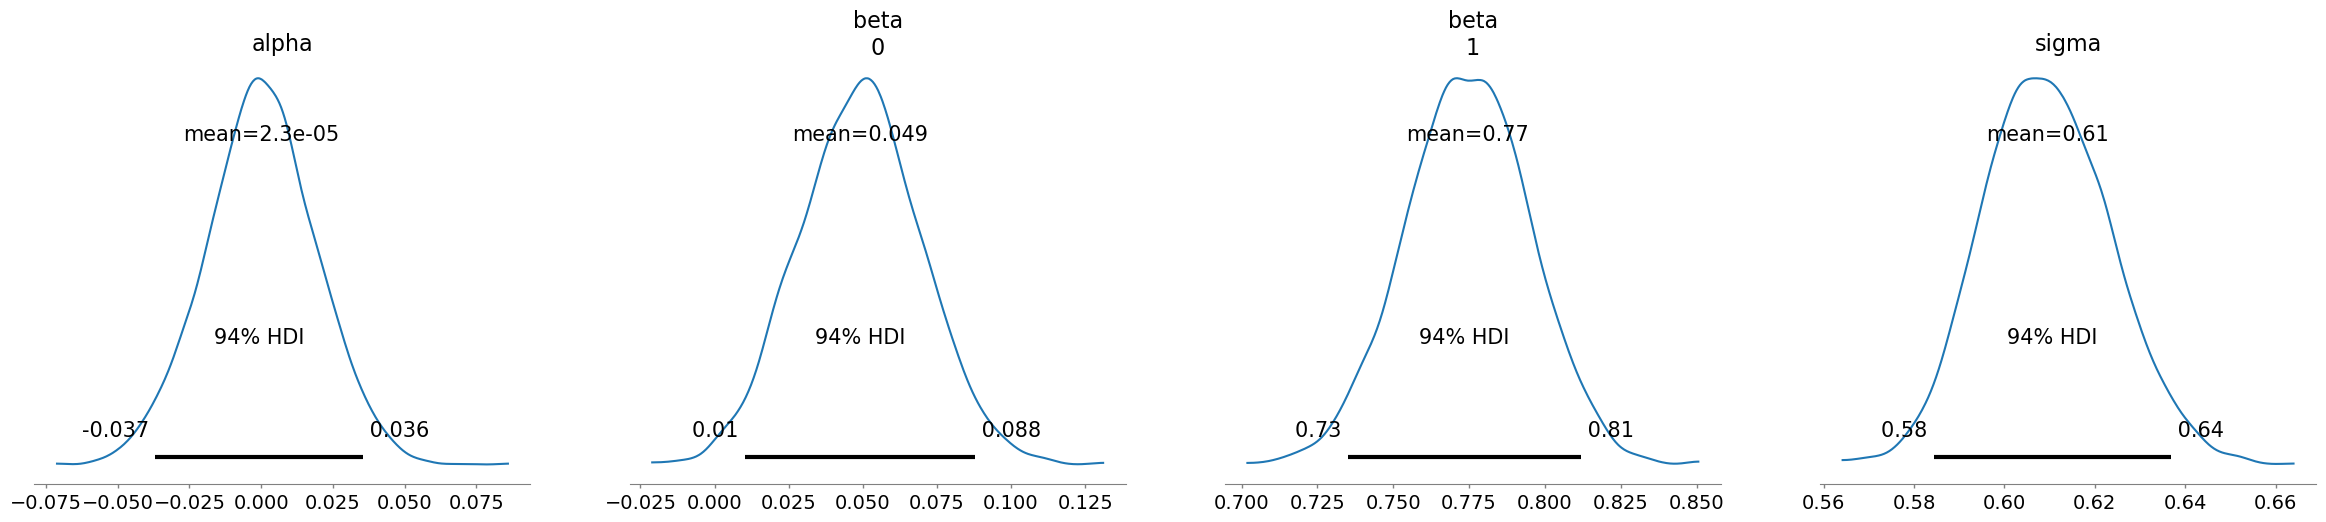

In [ ]:
# 参数的后验分布图，选取对象为trace，选取其中'alpha','beta','sigma'三个参数
az.plot_posterior(trace,var_names=['alpha','beta','sigma'])
# beta1和beta2的后验分布值大于0的比例，若大于95%则可认为对应的自变量对因变量有影响
print(f"beta0大于0的概率为{(trace.posterior.beta[0] > 0).mean().values}")
print(f"beta1大于0的概率为{(trace.posterior.beta[1] > 0).mean().values}")

#### 模型诊断

通过模型思维进行数据分析需要注意模型检验，即检验模型是否能有效的反应数据的特征。

下表格为模型参数的基本信息：

mean和sd 为各参数的均值和标准差；
hdi 3%-97% 为参数分布的可信区间的下限和上限
msce mean和sd 为mcmc采样标准误统计量的均值和标准差；
由于采样过程中存在自相关，不是所有样本都是有效的，ess bulk和tail 反应了mcmc采样有效样本数量相关性能，ess_bulk表明有效样本数的大小，一般大于100即可
r hat 为参数收敛性的指标。

In [ ]:
# 参数的后验分布图，选取对象为trace，选取其中'alpha','beta','sigma'三个参数
az.summary(trace,var_names=['alpha','beta','sigma'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.000,0.019,-0.037,0.036,0.0,0.0,4051.0,3262.0,1.0
beta[0],0.049,0.021,0.010,0.088,0.0,0.0,3096.0,2762.0,1.0
beta[1],0.775,0.021,0.735,0.812,0.0,0.0,3594.0,3122.0,1.0
sigma,0.609,0.014,0.585,0.637,0.0,0.0,3625.0,2887.0,1.0


### 后验预测检验 ppc (posterior predictive check)

后验预测分布就是利用现有数据对未来数据进行预测，即

$p(\tilde{Y}|Y)=\int_{\Theta }^{}p(\tilde{Y}|\theta)p(\theta|Y)d\theta$

In [ ]:
# 后验预测分布的计算仍在容器中进行
with linear_model:
    # pm.sample_posterior_predictive()利用trace.posterior的后验分布计算后验预测分布
    ppc_y = pm.sample_posterior_predictive(trace.posterior) 
#将ppc_y转化为InferenceData对象合并到trace中
az.concat(trace, az.from_pymc3(posterior_predictive=ppc_y), inplace=True)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


后验预测分布展示如下，横轴为观察到的数据，纵轴为概率密度，

黑色实线为真实的观测值的分布，蓝色实线为根据不同后验分布的参数值模拟得到的预测分布，

蓝色虚线为不同后验分布的参数值模拟得到的预测分布的平均值。

<AxesSubplot:xlabel='y_obs / y_obs'>

/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


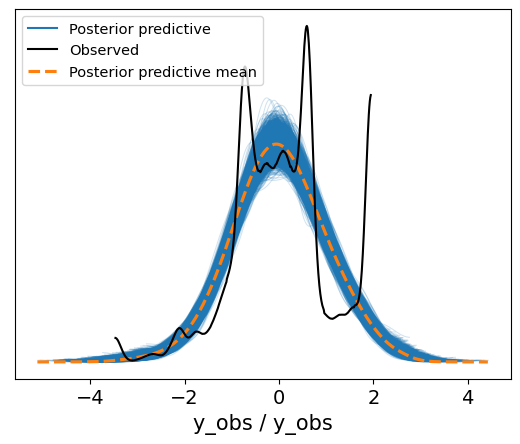

In [ ]:
# 绘制后验预测分布
az.plot_ppc(trace)

# 练习

还有研究发现个体创新行为可能与自尊水平有关。
SES_t:自尊水平；
EIB_t创新行为

Text(0, 0.5, 'EIB_t')

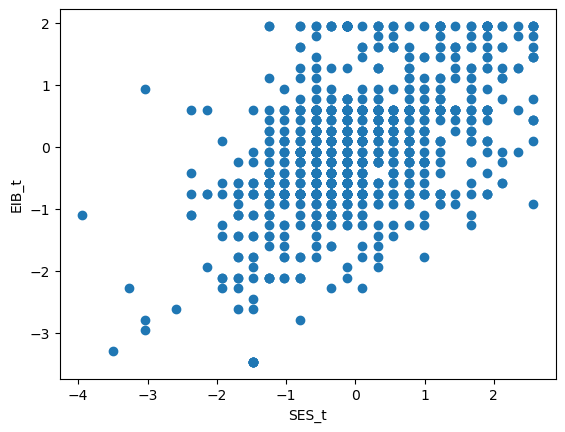

In [27]:
data['SES_t'] = (data['SES_t'] - data['SES_t'].mean()) / data['SES_t'].std()#将变量进行标准化

data['EIB_t'] = (data['EIB_t'] - data['EIB_t'].mean()) / data['EIB_t'].std()#将变量进行标准化

plt.scatter(data['SES_t'],data['EIB_t'])
plt.xlabel('SES_t')
plt.ylabel('EIB_t')

## workflow

尝试构建一个简单的线性模型

线性模型可以用概率的形式进行表达


$\alpha \sim Normal(0,10)$      ->      a $\sim$ Normal(mu,sigma)

$\beta  \sim Normal(0,10)$      ->      b $\sim$ Normal(mu,sigma)

$\sigma \sim HalfNormal(1)$      ->      sigma $\sim$ HalfNormal(1)

$\mu_i  = \alpha + \beta *x$      ->      mu = alpha + beta*x 

$y \sim Normal(\mu_i,sigma)$      ->      y $\sim$ Normal(mu,sigma)

请同学们从之前的代码中找到对应的部分，自己完成一个完整的workflow

### 建立模型

In [ ]:
########################################################
# 练习
# 请尝试表达自变量与预测值的线性关系,并将...替换为表达式
########################################################
linear_model = pm.Model()
with linear_model :
    #
    alpha = pm.Normal('alpha',mu=0,sd=10)
    beta = pm.Normal('beta',mu=0,sd=10,shape=2)
    sigma = pm.HalfNormal('sigma',sd=1)
    #
    x = pm.Data("x", x)
    #
    mu = pm.Deterministic("mu", ...) 
    #
    y_obs = pm.Normal('y_obs',mu=mu,sd=sigma,observed=y)

AttributeError: 'ellipsis' object has no attribute 'copy'

In [ ]:
########################################################
# 模型结构
# 
########################################################

### 模型拟合

In [ ]:
########################################################
# 模型拟合
# 采样方法为mcmc，采样次数为3000次，tune次数为500，接受率为0.5
########################################################

### 参数的后验分布

In [ ]:
########################################################
# 绘制参数的采样情况
# 
########################################################

In [ ]:
########################################################
# 绘制参数的森林图
# 
########################################################

In [ ]:
########################################################
# 绘制参数的后验分布
# 
########################################################

In [ ]:
########################################################
# 判断自变量是否能影响因变量
# 
########################################################

### 模型诊断

In [ ]:
########################################################
# 描述模型的统计指标
# 
########################################################

In [ ]:
########################################################
# 绘制后验分布预测
# 
########################################################